In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cargar los datos para poder visualizar al informacion

In [3]:
df = pd.read_csv('results.csv')

Analizar la informacion para poder predecir los resultados de un partido de futbol , si es que tendra victoria , empete o perdera  

In [4]:
df.describe()

,home_score,away_score
count,41243.000000,41243.000000
mean,1.744975,1.189317
std,1.750513,1.406648
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [5]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [8]:
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


creamos una columna local para ver si gano un equipo

In [10]:
df['Local_Win'] = df['home_score'] > df['away_score']

dividimos los datos en conjunto de entrenamiento y conjunto de prueba

In [11]:
X = df[['home_score', 'away_score']]
y = df['Local_Win']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


crear un modelo de arbol de decision y entrenarlo 

In [13]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

hacer predicciones en el conjunto de prueba

In [14]:
y_pred = model.predict(X_test)

Evaluar el rendimiento del modelo

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 1.0


In [20]:
print(f'Score del modelo: {round(model.score(X_test, y_test), 4) * 100}%')

Score del modelo: 100.0%


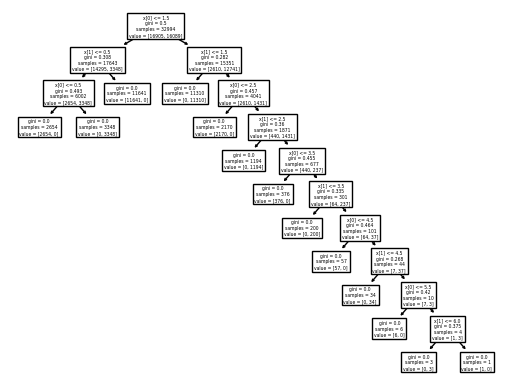

In [19]:
tree.plot_tree(model)
plt.show()